In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:

# Load the dataset
file_path = "D:/Sumitha/prostate_cancer_prediction.csv"
cancer_df = pd.read_csv(file_path)
cancer_df

Patient_ID  Age Family_History Race_African_Ancestry  PSA_Level  \
0              1   78             No                   Yes       5.07   
1              2   68             No                   Yes      10.24   
2              3   54             No                    No      13.79   
3              4   82             No                    No       8.03   
4              5   47            Yes                    No       1.89   
...          ...  ...            ...                   ...        ...   
5994        5995   84             No                   Yes       5.25   
5995        5996   65             No                    No       2.04   
5996        5997   67             No                    No       9.53   
5997        5998   71            Yes                    No      12.00   
5998        5999   84             No                   Yes      14.46   

     DRE_Result Biopsy_Result Difficulty_Urinating Weak_Urine_Flow  \
0        Normal        Benign                   No              No   
1        Normal        Benign                  Yes              No   
2        Normal        Benign                   No              No   
3      Abnormal        Benign                   No              No   
4        Normal     Malignant                  Yes             Yes   
...         ...           ...                  ...             ...   
5994   Abnormal        Benign                   No             Yes   
5995     Normal     Malignant                   No              No   
5996     Normal        Benign                   No              No   
5997     Normal        Benign                   No             Yes   
5998     Normal        Benign                   No              No   

     Blood_in_Urine  ... Alcohol_Consumption Hypertension Diabetes  \
0                No  ...            Moderate           No       No   
1                No  ...                 Low           No       No   
2                No  ...                 Low           No       No   
3                No  ...                 Low           No       No   
4                No  ...            Moderate          Yes       No   
...             ...  ...                 ...          ...      ...   
5994             No  ...                 Low           No      Yes   
5995             No  ...            Moderate           No       No   
5996             No  ...            Moderate           No       No   
5997            Yes  ...            Moderate           No      Yes   
5998             No  ...                 Low           No       No   

     Cholesterol_Level Screening_Age Follow_Up_Required Prostate_Volume  \
0               Normal            45                 No            46.0   
1                 High            65                 No            78.2   
2               Normal            61                 No            21.1   
3               Normal            47                Yes            79.9   
4               Normal            72                 No            32.0   
...                ...           ...                ...             ...   
5994            Normal            56                 No            28.0   
5995              High            73                Yes            53.4   
5996              High            73                Yes            75.3   
5997            Normal            54                Yes            66.3   
5998              High            62                Yes            79.8   

     Genetic_Risk_Factors  Previous_Cancer_History Early_Detection  
0                      No                       No             Yes  
1                      No                       No             Yes  
2                      No                       No             Yes  
3                      No                      Yes             Yes  
4                      No                       No             Yes  
...                   ...                      ...             ...  
5994                   No                       No             

In [5]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               5999 non-null   int64  
 1   Age                      5999 non-null   int64  
 2   Family_History           5999 non-null   object 
 3   Race_African_Ancestry    5999 non-null   object 
 4   PSA_Level                5999 non-null   float64
 5   DRE_Result               5999 non-null   object 
 6   Biopsy_Result            5999 non-null   object 
 7   Difficulty_Urinating     5999 non-null   object 
 8   Weak_Urine_Flow          5999 non-null   object 
 9   Blood_in_Urine           5999 non-null   object 
 10  Pelvic_Pain              5999 non-null   object 
 11  Back_Pain                5999 non-null   object 
 12  Erectile_Dysfunction     5999 non-null   object 
 13  Cancer_Stage             5999 non-null   object 
 14  Treatment_Recommended   

In [6]:
cancer_df.describe()

Patient_ID          Age    PSA_Level          BMI  Screening_Age  \
count  5999.000000  5999.000000  5999.000000  5999.000000    5999.000000   
mean   3000.000000    64.707118     7.743312    26.519087      56.834472   
std    1731.906464    14.367865     4.217982     4.907604      10.202016   
min       1.000000    40.000000     0.500000    18.000000      40.000000   
25%    1500.500000    52.000000     4.100000    22.200000      48.000000   
50%    3000.000000    65.000000     7.640000    26.500000      57.000000   
75%    4499.500000    77.000000    11.435000    30.800000      66.000000   
max    5999.000000    89.000000    15.000000    35.000000      74.000000   

       Prostate_Volume  
count      5999.000000  
mean         47.434489  
std          18.755145  
min          15.000000  
25%          31.300000  
50%          47.300000  
75%          63.700000  
max          80.000000

In [7]:

# Drop irrelevant columns
cancer_df.drop(columns=['Patient_ID'], inplace=True)

# Encode categorical variables
label_encoders = {}
for col in cancer_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    cancer_df[col] = le.fit_transform(cancer_df[col])
    label_encoders[col] = le
cancer_df

Age  Family_History  Race_African_Ancestry  PSA_Level  DRE_Result  \
0      78               0                      1       5.07           1   
1      68               0                      1      10.24           1   
2      54               0                      0      13.79           1   
3      82               0                      0       8.03           0   
4      47               1                      0       1.89           1   
...   ...             ...                    ...        ...         ...   
5994   84               0                      1       5.25           0   
5995   65               0                      0       2.04           1   
5996   67               0                      0       9.53           1   
5997   71               1                      0      12.00           1   
5998   84               0                      1      14.46           1   

      Biopsy_Result  Difficulty_Urinating  Weak_Urine_Flow  Blood_in_Urine  \
0                 0                     0                0               0   
1                 0                     1                0               0   
2                 0                     0                0               0   
3                 0                     0                0               0   
4                 1                     1                1               0   
...             ...                   ...              ...             ...   
5994              0                     0                1               0   
5995              1                     0                0               0   
5996              0                     0                0               0   
5997              0                     0                1               1   
5998              0                     0                0               0   

      Pelvic_Pain  ...  Alcohol_Consumption  Hypertension  Diabetes  \
0               0  ...                    2             0         0   
1               1  ...                    1             0         0   
2               1  ...                    1             0         0   
3               0  ...                    1             0         0   
4               0  ...                    2             1         0   
...           ...  ...                  ...           ...       ...   
5994            0  ...                    1             0         1   
5995            0  ...                    2             0         0   
5996            0  ...                    2             0         0   
5997            0  ...                    2             0         1   
5998            0  ...                    1             0         0   

      Cholesterol_Level  Screening_Age  Follow_Up_Required  Prostate_Volume  \
0                     1             45                   0             46.0   
1                     0             65                   0             78.2   
2                     1             61                   0             21.1   
3                     1             47                   1             79.9   
4                     1             72                   0             32.0   
...                 ...            ...                 ...              ...   
5994                  1             56                   0             28.0   
5995                  0             73                   1             53.4   
5996                  0             73                   1             75.3   
5997                  1             54                   1             66.3   
5998                  0             62                   1             79.8   

      Genetic_Risk_Factors  Previous_Cancer_History  Early_Detection  
0                        0                        0                1  
1                        0                        0                1  
2                        0                        0                1  
3                        0                        1                1  
4          

In [8]:

# Define X (features) and Y (target)
X = cancer_df.drop(columns=['Biopsy_Result'])
y = cancer_df['Biopsy_Result']


In [9]:


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)


In [11]:

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)*100
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


Accuracy: 70.6667
Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       422
           1       1.00      0.01      0.02       178

    accuracy                           0.71       600
   macro avg       0.85      0.51      0.42       600
weighted avg       0.79      0.71      0.59       600



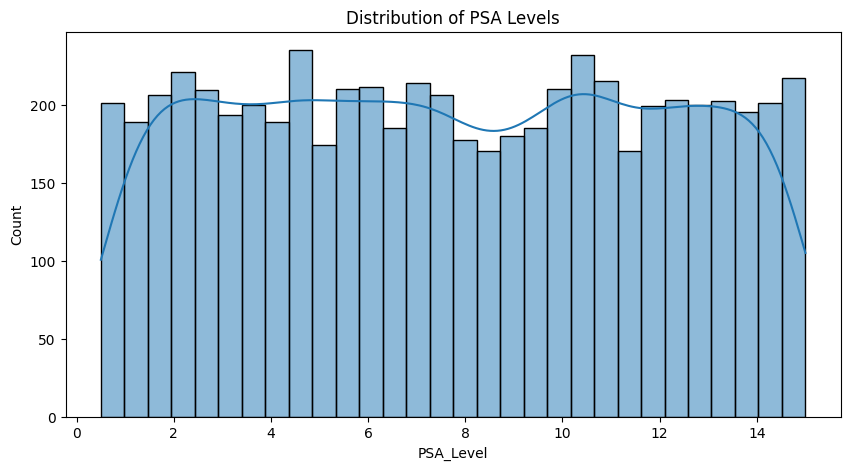

In [12]:
# EDA - Data Distribution
plt.figure(figsize=(10, 5))
sns.histplot(cancer_df['PSA_Level'], kde=True, bins=30)
plt.title("Distribution of PSA Levels")
plt.show();

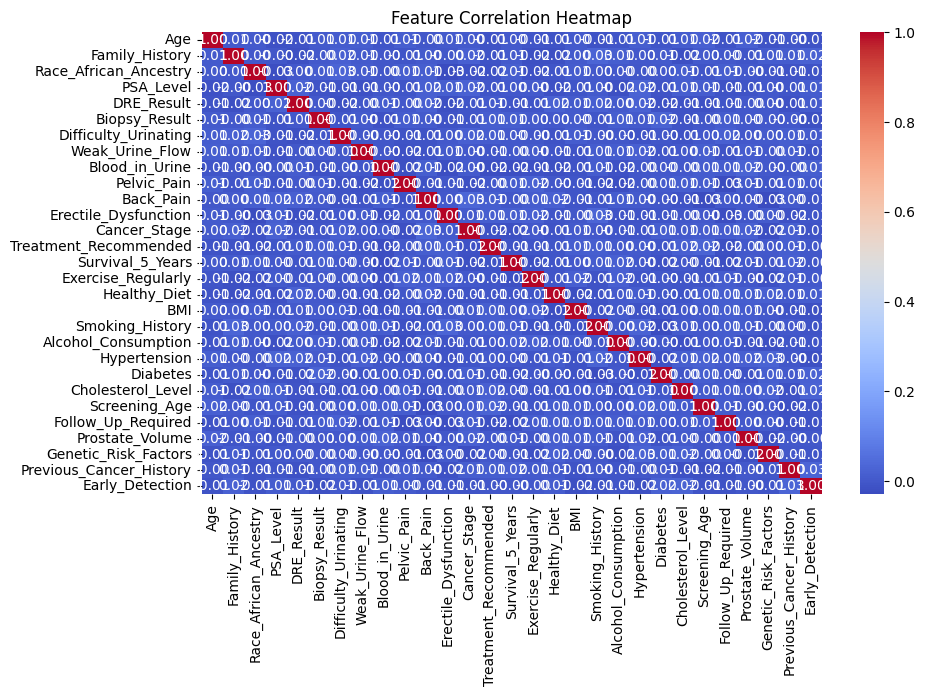

In [13]:
# EDA - Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cancer_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show();

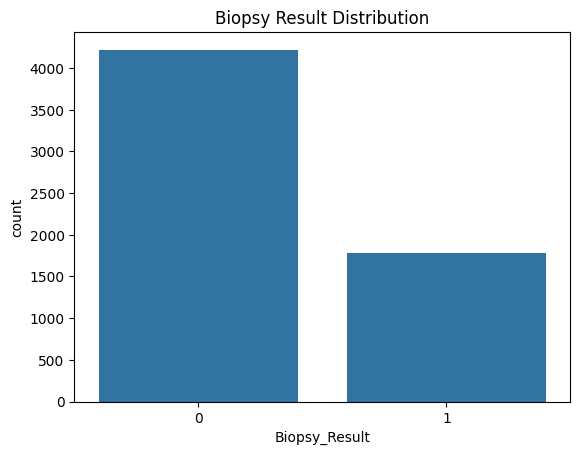

In [14]:

# EDA - Biopsy Result Count
sns.countplot(x=cancer_df['Biopsy_Result'])
plt.title("Biopsy Result Distribution")
plt.show();

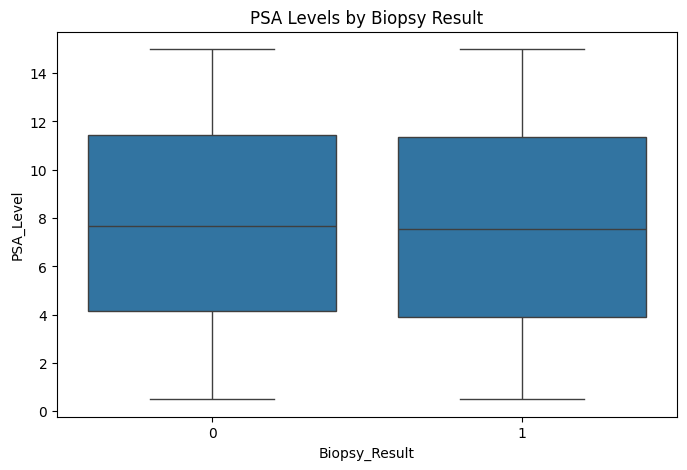

In [15]:

# EDA - Boxplot of PSA by Biopsy Result
plt.figure(figsize=(8, 5))
sns.boxplot(x=cancer_df['Biopsy_Result'], y=cancer_df['PSA_Level'])
plt.title("PSA Levels by Biopsy Result")
plt.show();

In [3]:
import chess

class ChessBot:
    def __init__(self):
        self.board = chess.Board()

    def is_valid_move(self, move_uci):
        """Check if a move is legal."""
        move = chess.Move.from_uci(move_uci)
        return move in self.board.legal_moves

    def make_move(self, move_uci):
        """Attempt to make a move if valid."""
        if not self.is_valid_move(move_uci):
            return "Invalid move! Try again."

        self.board.push(chess.Move.from_uci(move_uci))

        if self.board.is_checkmate():
            return "Checkmate! You win!" if self.board.turn else "Checkmate! Bot wins!"
        if self.board.is_stalemate():
            return "Stalemate! It's a draw."

        return self.bot_move()

    def bot_move(self):
        """Bot makes a simple move (chooses first available move)."""
        if not self.board.legal_moves:
            return "No moves left! It's a draw."

        bot_move = next(iter(self.board.legal_moves))  # Pick first legal move
        self.board.push(bot_move)
        
        if self.board.is_checkmate():
            return f"Bot moves {bot_move}. Checkmate! Bot wins!"
        if self.board.is_stalemate():
            return f"Bot moves {bot_move}. Stalemate! It's a draw."

        return f"Bot moves {bot_move}. Your turn!"

    def display_board(self):
        """Prints the current board state."""
        return str(self.board)

# Example Usage:
bot = ChessBot()

while True:
    print(bot.display_board())  # Show the board
    user_move = input("Enter your move (e.g., g2g4): ").strip().lower()
    
    if user_move == "exit":
        break

    print(bot.make_move(user_move))


r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
Invalid move! Try again.
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
Invalid move! Try again.
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
Invalid move! Try again.
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
Bot moves g8h6. Your turn!
r n b q k b . r
p p p p p p p p
. . . . . . . n
. . . . . . . .
. . . . . . . .
. P . . . . . .
P . P P P P P P
R N B Q K B N R
Bot moves h8g8. Your turn!
r n b q k b r .
p p p p p p p p
. . . . . . . n
. . . . . . . .
. . . . . . . .
B P . . . . . .
P . P P P P P P
R N . Q K B N R
Invalid move! Try again.
r n b q k b r .
p p p p p p p p
. . . . . . . n
. . . . . . . .
. . . . . . . 

KeyboardInterrupt: Interrupted by user

In [ ]:
import random

# 8x8 chess board
board = [
    ["r", "n", "b", "q", "k", "b", "n", "r"],
    ["p", "p", "p", "p", "p", "p", "p", "p"],
    [".", ".", ".", ".", ".", ".", ".", "."],
    [".", ".", ".", ".", ".", ".", ".", "."],
    [".", ".", ".", ".", ".", ".", ".", "."],
    [".", ".", ".", ".", ".", ".", ".", "."],
    ["P", "P", "P", "P", "P", "P", "P", "P"],
    ["R", "N", "B", "Q", "K", "B", "N", "R"]
]

piece_values = {"K": 900, "Q": 90, "R": 50, "B": 30, "N": 30, "P": 10,
                "k": -900, "q": -90, "r": -50, "b": -30, "n": -30, "p": -10, ".": 0}

def print_board():
    for row in board:
        print(" ".join(row))
    print()

def evaluate_board():
    """Evaluates board state by summing up piece values."""
    score = 0
    for row in board:
        for piece in row:
            score += piece_values[piece]
    return score

def generate_moves(player):
    """Generates valid moves for the player (uppercase = White, lowercase = Black)."""
    moves = []
    for x in range(8):
        for y in range(8):
            piece = board[x][y]
            if (player == "white" and piece.isupper()) or (player == "black" and piece.islower()):
                moves.extend(valid_moves(x, y))
    return moves

def valid_moves(x, y):
    """Returns a list of valid moves for a given piece."""
    piece = board[x][y].lower()
    moves = []
    
    directions = {
        "p": [(1, 0), (1, 1), (1, -1)],
        "r": [(1, 0), (-1, 0), (0, 1), (0, -1)],
        "b": [(1, 1), (1, -1), (-1, 1), (-1, -1)],
        "q": [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (1, -1), (-1, 1), (-1, -1)],
        "n": [(2, 1), (2, -1), (-2, 1), (-2, -1), (1, 2), (1, -2), (-1, 2), (-1, -2)],
        "k": [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (1, -1), (-1, 1), (-1, -1)]
    }
    
    if piece in directions:
        for dx, dy in directions[piece]:
            new_x, new_y = x + dx, y + dy
            if 0 <= new_x < 8 and 0 <= new_y < 8 and board[new_x][new_y] not in board[x][y]:
                moves.append((x, y, new_x, new_y))
    
    return moves

def minimax(depth, alpha, beta, maximizing):
    """Minimax algorithm with alpha-beta pruning."""
    if depth == 0:
        return evaluate_board(), None

    best_move = None
    if maximizing:
        max_eval = float("-inf")
        for move in generate_moves("white"):
            make_move(move)
            eval_score, _ = minimax(depth - 1, alpha, beta, False)
            undo_move(move)
            if eval_score > max_eval:
                max_eval = eval_score
                best_move = move
            alpha = max(alpha, eval_score)
            if beta <= alpha:
                break
        return max_eval, best_move
    else:
        min_eval = float("inf")
        for move in generate_moves("black"):
            make_move(move)
            eval_score, _ = minimax(depth - 1, alpha, beta, True)
            undo_move(move)
            if eval_score < min_eval:
                min_eval = eval_score
                best_move = move
            beta = min(beta, eval_score)
            if beta <= alpha:
                break
        return min_eval, best_move

def make_move(move):
    """Executes a move on the board."""
    x1, y1, x2, y2 = move
    board[x2][y2] = board[x1][y1]
    board[x1][y1] = "."

def undo_move(move):
    """Undoes a move."""
    x1, y1, x2, y2 = move
    board[x1][y1], board[x2][y2] = board[x2][y2], "."

def best_ai_move():
    """Finds the best AI move using Minimax."""
    _, move = minimax(3, float("-inf"), float("inf"), True)
    return move

print_board()

while True:
    user_move = input("Enter move (e.g., '6 4 4 4' for e2 to e4) or 'suggest': ").strip()
    
    if user_move.lower() == "exit":
        break

    if user_move.lower() == "suggest":
        ai_move = best_ai_move()
        if ai_move:
            print(f"AI suggests: {ai_move}")
        else:
            print("No strong move found!")
        continue

    try:
        x1, y1, x2, y2 = map(int, user_move.split())
        if (x1, y1, x2, y2) in generate_moves("white"):
            make_move((x1, y1, x2, y2))
            print("Move successful!")
            ai_move = best_ai_move()
            if ai_move:
                make_move(ai_move)
                print(f"AI moved: {ai_move}")
        else:
            print("Invalid move! Try again.")
    except:
        print("Invalid input! Use row column row column (e.g., '6 4 4 4')")

    print_board()


r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R

Invalid input! Use row column row column (e.g., '6 4 4 4')
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R

Invalid input! Use row column row column (e.g., '6 4 4 4')
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R

Invalid move! Try again.
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R

